In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

original_data=pd.read_csv('/Users/neiloza/Downloads/lending-club-loan-data/loan.csv',low_memory=True)

/Users/neiloza/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
entries=len(original_data.index)
percentile=.4
loan_data=original_data.dropna(thresh=int(percentile*entries),axis=1)
loan_data=loan_data[loan_data.loan_status!='Fully Paid']
loan_data.head(100)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N
5,5550,5550,5550.0,36 months,15.02,192.45,C,C3,Director COE,10+ years,...,60.0,0.0,0.0,831687.0,185378.0,65900.0,203159.0,N,Cash,N
6,2000,2000,2000.0,36 months,17.97,72.28,D,D1,Account Manager,4 years,...,NaN,0.0,0.0,854.0,854.0,0.0,0.0,N,Cash,N
7,6000,6000,6000.0,36 months,13.56,203.79,C,C1,Assistant Director,10+ years,...,85.7,0.0,0.0,117242.0,91535.0,33100.0,61742.0,N,DirectPay,N
8,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Legal Assistant III,10+ years,...,60.0,0.0,0.0,57426.0,41882.0,21500.0,34626.0,N,Cash,N
9,6000,6000,6000.0,36 months,14.47,206.44,C,C2,NaN,< 1 year,...,26.3,0.0,0.0,477390.0,105911.0,98300.0,89600.0,N,Cash,N


In [3]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218716 entries, 0 to 2260667
Data columns (total 103 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          object
int_rate                      float64
installment                   float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              object
inq_last_6mths                f

In [4]:
columns_to_drop=['emp_title','title','pymnt_plan','zip_code','out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','issue_d','earliest_cr_line']

In [5]:
loan_data=loan_data.drop(columns_to_drop,axis=1)

In [6]:
loan_data.loan_status.value_counts()

Current                                                919695
Charged Off                                            261655
Late (31-120 days)                                      21897
In Grace Period                                          8952
Late (16-30 days)                                        3737
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    31
Name: loan_status, dtype: int64

In [7]:
sample=loan_data.sample(n=10000)
y=sample.loan_status
y=y.apply(lambda x: 0 if x=='Current'or x=='In Grace Period' else 1)
loan_data=sample.drop(['loan_status'],axis=1)
dummied_loan_data=pd.get_dummies(loan_data,drop_first=True)


In [16]:
X_fillna_median=dummied_loan_data.fillna(dummied_loan_data.median())
X_fillna_mean=dummied_loan_data.fillna(dummied_loan_data.mean())
X_fillna_none=dummied_loan_data

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
rf=RandomForestClassifier()
lr=LogisticRegression()
gnb=GaussianNB()




In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve as prc,f1_score, recall_score, precision_score, roc_auc_score,roc_curve,accuracy_score

In [24]:
mean_X_train, mean_X_test, mean_y_train, mean_y_test=train_test_split(X_fillna_mean,y,test_size=.25,random_state=42)
med_X_train, med_X_test, med_y_train, med_y_test=train_test_split(X_fillna_median,y,test_size=.25,random_state=42)

In [11]:
def evaluate_model(func_X_train,func_X_test,func_y_train, func_y_test, model):
    
    
    model.fit(func_X_train,func_y_train)
    prob_of_1=model.predict_proba(func_X_test)[:,1]
    precision, recall, threshold=prc(y_true=func_y_test,probas_pred=prob_of_1)
    threshold=np.insert(threshold, 0,0)
    f1=np.multiply(precision,recall)
    plt.plot(threshold,precision)
    plt.plot(threshold,recall)
    plt.plot(threshold,f1)
    plt.legend(['Precision','Recall','f1'])
    plt.xlabel('Threshold')
    plt.ylabel('Metric')
    plt.title('Precision Recall Curve')
    plt.show()
    print('the Precision is '+str(precision_score(y_true=func_y_test,y_pred=model.predict(func_X_test))))
    print('the Recall is '+str(recall_score(y_true=func_y_test,y_pred=model.predict(func_X_test))))
    print('the f1 score is '+str(f1_score(func_y_test,model.predict(func_X_test))))
    print('the roc-auc score is '+str(roc_auc_score(func_y_test,prob_of_1)))
    print('the accuracy score is '+str(accuracy_score(func_y_test,model.predict(func_X_test))))
    

    fpr, tpr, threshold2=roc_curve(func_y_test,prob_of_1)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(' ROC Curve')
    plt.show()

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


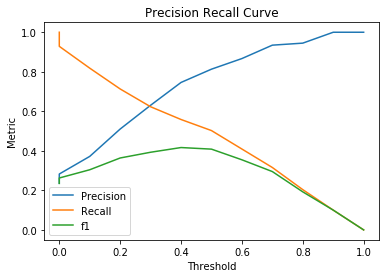

the Precision is 0.8131868131868132
the Recall is 0.5025466893039049
the f1 score is 0.621196222455404
the roc-auc score is 0.8141281065122928
the accuracy score is 0.8556


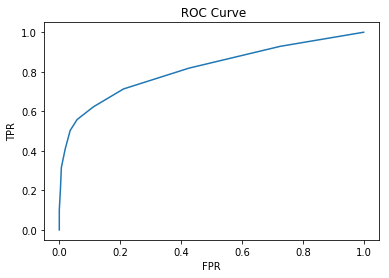

In [12]:
evaluate_model(X_fillna_median,y,rf)

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


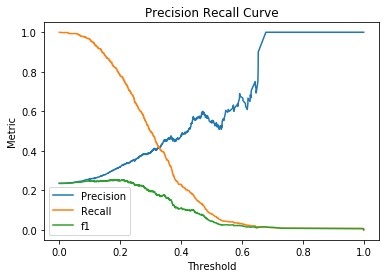

the Precision is 0.5454545454545454
the Recall is 0.08149405772495756
the f1 score is 0.14180206794682423
the roc-auc score is 0.6954589593444795
the accuracy score is 0.7676


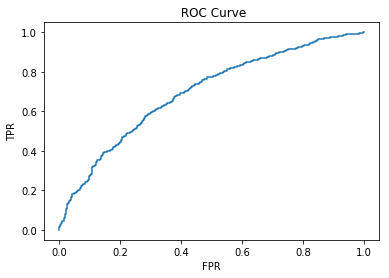

In [13]:
evaluate_model(X_fillna_mean,y,lr)

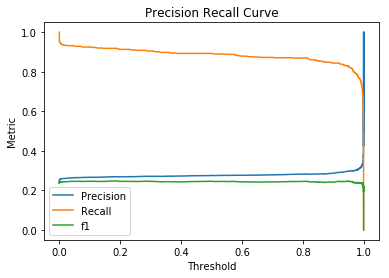

the Precision is 0.2755369303300157
the Recall is 0.8930390492359932
the f1 score is 0.42113690952762206
the roc-auc score is 0.700520354413151
the accuracy score is 0.4216


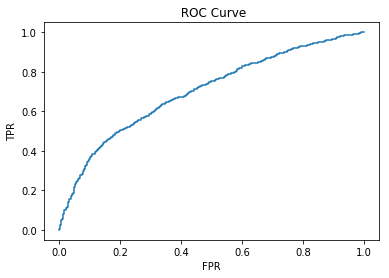

In [18]:
evaluate_model(X_fillna_mean,y,gnb)

In [23]:
from sklearn.model_selection import GridSearchCV
def tune_hyperparameters(X,y,params, model):
    gcv=GridSearchCV(model,params,cv=5)
    gcv.fit(X,y)
    print("best params are "+ str(gcv.best_params_))
    print("best score is "+ str(gcv.best_score_))






In [25]:
rf_params={'n_estimators':[100],'max_depth':[25,30,35],'max_features':[.30,.35,.40]}
tune_hyperparameters(med_X_train,med_y_train,rf_params,rf)

best params are {'max_depth': 30, 'max_features': 0.4, 'n_estimators': 100}
best score is 0.864


In [27]:
gnb_params={'var_smoothing':[.0001,.001,.01,.1]}
tune_hyperparameters(med_X_train,med_y_train,gnb_params,gnb)

best params are {'var_smoothing': 0.1}
best score is 0.6253333333333333


In [28]:
log_params={'penalty':['l1','l2'],'C':[.1,.5,1,2,3]}
tune_hyperparameters(mean_X_train,mean_y_train,log_params,lr)

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

best params are {'C': 2, 'penalty': 'l1'}
best score is 0.8189333333333333
